## Autoregressive (AR) Models Time series Chapter 3
source : Datacamp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10, 5)
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA


### 1 :Describe AR Model

Mathematical Description of AR(1) Model

𝑅𝑡 = 𝜇+ 𝜙𝑅𝑡−1 + 𝜖𝑡   -  Since there is only one lagged value on the right hand side, this is called an AR model of order 1, or simply an AR(1) model. If the AR parameter, phi, is one, then the process is a random walk. If phi is zero, then the process is white noise. In order for the process to be stable and stationary, phi has to be between -1 and +1.
 
Since only one lagged value or right hand side, this is called,
AR model of order 1 or, AR(1) model

AR paramter  𝜙 

For stationary,  −1<𝜙<1 

Interpretation of AR(1) Parameter

Negative  𝜙 : Mean Reversion

Positive  𝜙 : Momentum

High order AR Models

AR(1)

𝑅𝑡 = 𝜇  +𝜙1𝑅𝑡−1 + 𝜖𝑡

 
AR(2)

𝑅𝑡 = 𝜇 + 𝜙1𝑅𝑡−1 + 𝜙2𝑅𝑡−2 + 𝜖𝑡
 
AR(3)

𝑅𝑡 = 𝜇 + 𝜙1𝑅𝑡−1 + 𝜙2𝑅𝑡−2 + 𝜙3𝑅𝑡−3 + 𝜖𝑡
 
⋯




#### 1 A :Simulate AR(1) Time Series
You will simulate and plot a few AR(1) time series, each with a different parameter,  𝜙 , using the arima_process module in statsmodels. In this exercise, you will look at an AR(1) model with a large positive  𝜙  and a large negative  𝜙 , but feel free to play around with your own parameters.

There are a few conventions when using the arima_process module that require some explanation. First, these routines were made very generally to handle both AR and MA models. We will cover MA models next, so for now, just ignore the MA part. Second, when inputting the coefficients, you must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with  𝜙 =0.9, the array representing the AR parameters would be ar = np.array([1, -0.9])

 - Import the class ArmaProcess in the arima_process module.
 - Plot the simulated AR processes:
 - Let ar1 represent an array of the AR parameters [1, ] as explained above. For now, the MA parameter array, ma1, will contain just the lag-zero coefficient of one.
 - With parameters ar1 and ma1, create an instance of the class ArmaProcess(ar,ma) called AR_object1.
 - Simulate 1000 data points from the object you just created, AR_object1, using the method .generate_sample(). Plot the simulated data in a subplot.
 - Repeat for the other AR parameter.

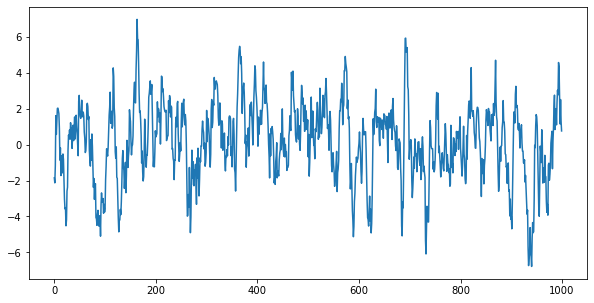

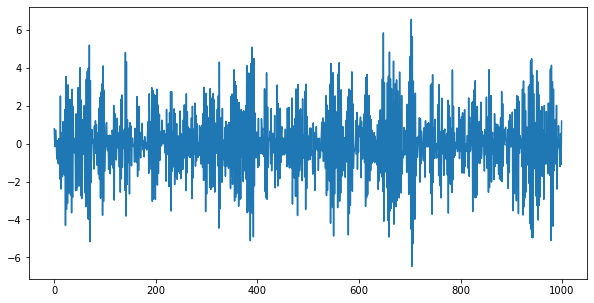

In [2]:
# Import the class ArmaProcess in the arima_process module.
from statsmodels.tsa.arima_process import ArmaProcess

# Plot the simulated AR processes: +0.9

   # Let ar1 represent an array of the AR parameters [1, ] as explained above.
   # For now, the MA parameter array, ma1, will contain just the lag-zero coefficient of one.
  # With parameters ar1 and ma1, create an instance of the class ArmaProcess(ar,ma) called AR_object1.
  # Simulate 1000 data points from the object you just created, AR_object1, using the method .generate_sample(). 
   #Plot the simulated data in a subplot.

ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1);
plt.show()

# Repeat for the other AR parameter.
# Plot 2: AR parameter = -0.9

ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

Note: The two AR parameters produce very different looking time series plots, but in the next exercise you'll really be able to distinguish the time series.

#### 1 B Compare the ACF for Several AR Time Series
The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter,  𝜙=+0.9 , the first-lag autocorrelation will be  0.9 , the second-lag will be  (0.9)2=0.81 , the third-lag will be  (0.9)3=0.729 , etc. A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say  −0.9 , the decay will flip signs, so the first-lag autocorrelation will be  −0.9 , the second-lag will be  (−0.9)2=0.81 , the third-lag will be  (−0.9)3=−0.729 , etc.

 - Compute the autocorrelation function for each of the three simulated datasets using the plot_acf function with 20 lags (and suppress the confidence intervals by setting alpha=1).

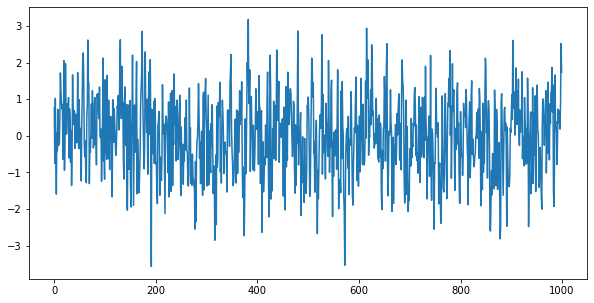

In [3]:
# AR parameter = +0.3
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)
plt.show()

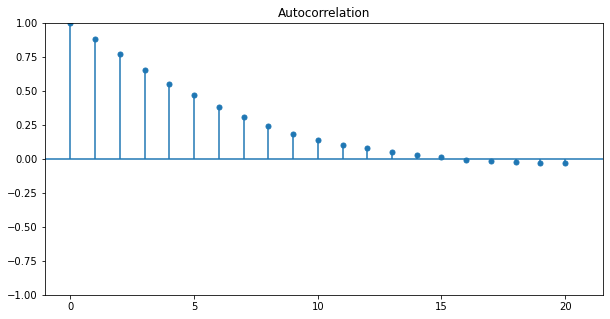

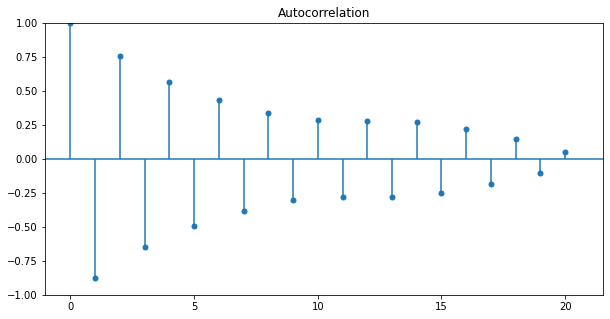

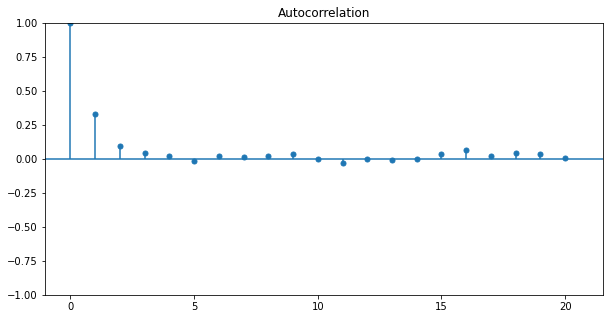

In [4]:
#Compute the autocorrelation function for each of the three simulated datasets using the plot_acf function
#with 20 lags (and suppress the confidence intervals by setting alpha=1).

## Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, lags=20, alpha=1)
plt.show()
## Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, lags=20, alpha=1)
plt.show()
## Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, lags=20, alpha=1)
plt.show()

### 2: Estimating and Forecasting AR Model

Import ARMA, which is a class, and create an instance of that class called mod, with the arguments being the data that you're trying to fit, and the order of the model. The order (1,0) means you're fitting the data to an AR(1) model. An order (2,0) would mean you're fitting the data to an AR(2) model. The second part of the order is the MA part, which will be discussed in the next chapter. Once you instantiate the class, you can use the method fit to estimate the model, and store the results in result.

To see the full output, use the summary method on result. The coefficients for the mean mu and AR(1) parameter phi are highlighted in red. In the simulated data, mu was zero and phi was 0.9, and you can see that the estimated parameters are very close to the true parameters.

#### 2. A Estimating an AR Model
You will estimate the AR(1) parameter, 𝜙 , of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For simulated_data_1 with a true 𝜙  of 0.9, you will print out the estimate of 𝜙. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.

 - Import the class ARMA in the module statsmodels.tsa.arima_model.
 - Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q) of the model (in this case, for an AR(1)), is order=(1,0).
 - Fit the model mod using the method .fit() and save it in a results object called res.
 - Print out the entire summary of results using the .summary() method.
 - Just print out an estimate of the constant and  using the .params attribute (no parentheses).

In [5]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA

In [6]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an AR(1) model to the first simulated data, order(1,0)
mod = ARIMA(simulated_data_1, order=(1, 0, 0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1415.359
Date:                Mon, 17 Jan 2022   AIC                           2836.717
Time:                        14:11:58   BIC                           2851.440
Sample:                             0   HQIC                          2842.313
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1487      0.275      0.540      0.589      -0.391       0.688
ar.L1          0.8854      0.015     60.171      0.000       0.857       0.914
sigma2         0.9913      0.044     22.781      0.0

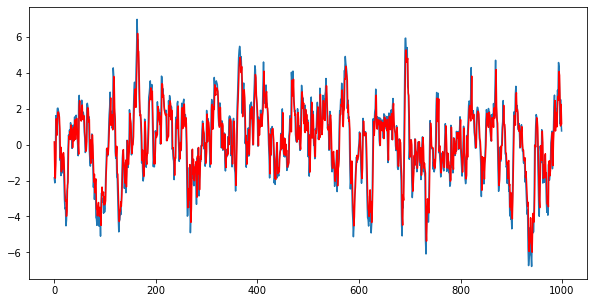

In [7]:
# Call figure() and plot() on the plt
plt.plot(figsize=(15,10))
plt.plot(simulated_data_1)
plt.plot(res.predict(), color = 'red')

Note :Notice how close the estimated parameter is to the true parameter.

#### 2 B:  Forecasting with an AR Model

In addition to estimating the parameters of a model that you did in the last exercise, you can also do forecasting, both in-sample and out-of-sample using statsmodels. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. These forecasts can be made using either the predict() method if you want the forecasts in the form of a series of data, or using the plot_predict() method if you want a plot of the forecasted data. You supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

For the simulated series simulated_data_1 with 𝜙 = 0.9, you will plot in-sample and out-of-sample forecasts.

 - Import the class ARMA in the module statsmodels.tsa.arima_model
 - Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q) of the model (in this case, for an AR(1) order=(1,0)
 - Fit the model mod using the method .fit() and save it in a results object called res
 - Plot the in-sample and out-of-sample forecasts of the data using the plot_predict() method
 - Start the forecast 10 data points before the end of the 1000 point series at 990, and end the forecast 10 data points after the end of the series at point 1010

In [8]:
# Import the class ARMA in the module statsmodels.tsa.arima_model.from statsmodels.tsa.arima_model import ARMA

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q)
   # of the model (in this case, for an AR(1)), is order=(1,0).
mod = ARIMA(simulated_data_1, order=(1,0, 0))    

# Fit the model mod using the method .fit() and save it in a results object called res.
res = mod.fit()

# Print out the entire summary of results using the .summary() method.
print(res.summary())

# Just print out an estimate of the constant and using the .params attribute (no parentheses).
print(res.params)

plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1415.359
Date:                Mon, 17 Jan 2022   AIC                           2836.717
Time:                        14:12:02   BIC                           2851.440
Sample:                             0   HQIC                          2842.313
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1487      0.275      0.540      0.589      -0.391       0.688
ar.L1          0.8854      0.015     60.171      0.000       0.857       0.914
sigma2         0.9913      0.044     22.781      0.0

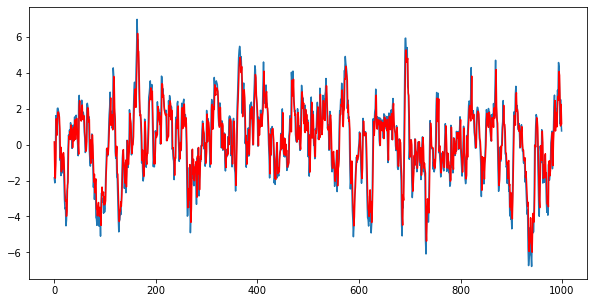

In [9]:
# Call figure() and plot() on the plt
plt.plot(figsize=(15,10))
plt.plot(simulated_data_1)
plt.plot(res.predict(), color = 'red')

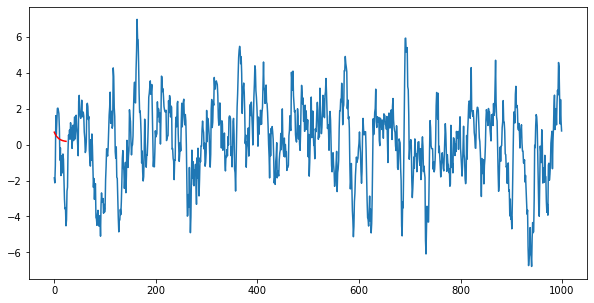

In [10]:
forecast = res.forecast(24)
plt.plot(figsize=(15,10))
plt.plot(simulated_data_1)
plt.plot(forecast, color = 'red')

In [11]:
res



![](img13.png)

note: Notice how, when phi is high like here, the forecast gradually moves to the long term mean of zero, but if phi were low, it would move much quicker to the long term mean. Try it out and see for yourself!

#### 2 C: Let's Forecast Interest Rates

You will now use the forecasting techniques you learned in the last exercise and apply it to real data rather than simulated data. You will revisit a dataset from the first chapter: the annual data of 10-year interest rates going back 56 years, which is in a Series called interest_rate_data. Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

You saw in the first chapter that there is some mean reversion in interest rates over long horizons. In other words, when interest rates are high, they tend to drop and when they are low, they tend to rise over time. Currently they are below long-term rates, so they are expected to rise, but an AR model attempts to quantify how much they are expected to rise.

 - Import the class ARMA in the module statsmodels.tsa.arima_model.
 - Create an instance of the ARMA class called mod using the annual interest rate data and choosing the order for an AR(1) model.
 - Fit the model mod using the method .fit() and save it in a results object called res.
 - Plot the in-sample and out-of-sample forecasts of the data using the .plot_predict() method.
 - Pass the arguments start=0 to start the in-sample forecast from the beginning, and choose end to be '2022' to forecast several years in the future.
 - Note that the end argument 2022 must be in quotes here since it represents a date and not an integer position.

In [105]:
bonds = pd.read_csv('./dataset/daily_rates.csv', index_col=0)
bonds.index = pd.to_datetime(bonds.index, format="%Y-%m-%d")
bonds.head()

,US10Y
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


In [106]:
interest_rate_data = bonds.resample(rule='A').last()
interest_rate_data.head()

,US10Y
DATE,
1962-12-31,3.85
1963-12-31,4.14
1964-12-31,4.21
1965-12-31,4.65
1966-12-31,4.64


                               SARIMAX Results                                
Dep. Variable:                  US10Y   No. Observations:                   56
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -89.736
Date:                Wed, 12 Jan 2022   AIC                            185.472
Time:                        21:04:48   BIC                            191.548
Sample:                    12-31-1962   HQIC                           187.827
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3057      2.222      2.388      0.017       0.952       9.660
ar.L1          0.9093      0.048     19.004      0.000       0.816       1.003
sigma2         1.3988      0.306      4.579      0.0

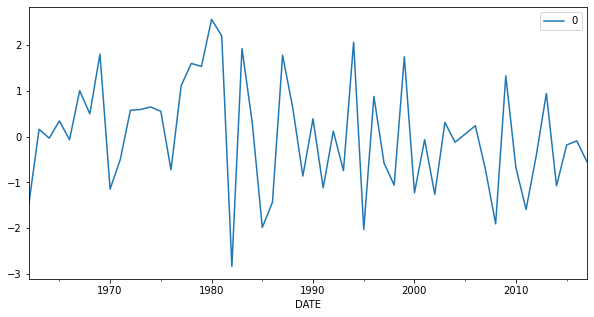

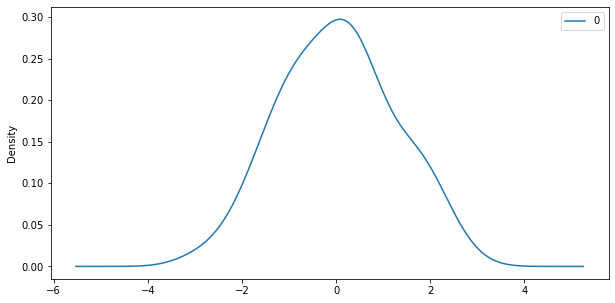

               0
count  56.000000
mean    0.023644
std     1.206474
min    -2.833615
25%    -0.773299
50%     0.008850
75%     0.702115
max     2.555486


In [181]:
from pandas import DataFrame
from matplotlib import pyplot

# Create an instance of the ARMA class called mod using the annual interest rate data and choosing the order for an AR(1) model.
mod = ARIMA(interest_rate_data, order=(1, 0, 0))   

# Fit the model mod using the method .fit() and save it in a results object called res
res = mod.fit()

# Plot the in-sample and out-of-sample forecasts of the data using the .plot_predict() method.
# Pass the arguments start=0 to start the in-sample forecast from the beginning, and choose end to be '2022' to forecast several years in the future.
# Note that the end argument 2022 must be in quotes here since it represents a date and not an integer position.


print(res.summary())
# res.plot_predict(start=0, end='2022')
# plt.legend(fontsize=8)

# line plot of residuals
residuals = DataFrame(res.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())


# ![](img14.png)

In [184]:
forecast = res.forecast()[0]
forecast

2.4451840858441103

note: According to an AR(1) model, 10-year interest rates are forecasted to rise from 2.16%, towards the end of 2017 to 3.35% in five years. Two common adjusted goodness-of-fit measures are called the Akaike Information Criterion and the Bayesian Information Criterion, AIC and BIC value.  In practice, the way to use the information criteria is to fit several models, each with a different number of parameters, and choose the one with the lowest Bayesian information criterion.

#### 2: D Compare AR Model with Random Walk
Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. You will compare the ACF for the slightly mean-reverting interest rate series of the last exercise with a simulated random walk with the same number of observations.

You should notice when plotting the autocorrelation of these two series side-by-side that they look very similar.

 - Import plot_acf function from the statsmodels module
 - Create two axes for the two subplots
 - Plot the autocorrelation function for 12 lags of the interest rate series interest_rate_data in the top plot
 - Plot the autocorrelation function for 12 lags of the interest rate series simulated_data in the bottom plot

In [138]:
simulated_data = np.array([5.        , 4.77522278, 5.60354317, 5.96406402, 5.97965372,
       6.02771876, 5.5470751 , 5.19867084, 5.01867859, 5.50452928,
       5.89293842, 4.6220103 , 5.06137835, 5.33377592, 5.09333293,
       5.37389022, 4.9657092 , 5.57339283, 5.48431854, 4.68588587,
       5.25218625, 4.34800798, 4.34544412, 4.72362568, 4.12582912,
       3.54622069, 3.43999885, 3.77116252, 3.81727011, 4.35256176,
       4.13664247, 3.8745768 , 4.01630403, 3.71276593, 3.55672457,
       3.07062647, 3.45264414, 3.28123729, 3.39193866, 3.02947806,
       3.88707349, 4.28776889, 3.47360734, 3.33260631, 3.09729579,
       2.94652178, 3.50079273, 3.61020341, 4.23021143, 3.94289347,
       3.58422345, 3.18253962, 3.26132564, 3.19777388, 3.43527681,
       3.37204482])

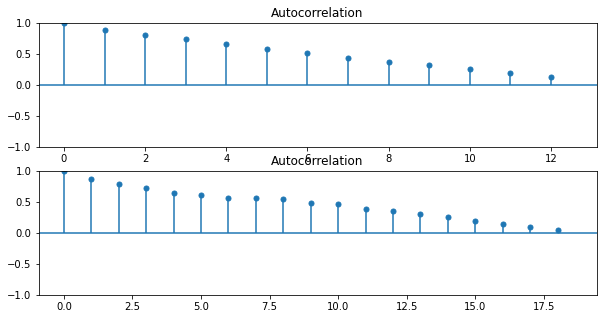

In [139]:
# Import plot_acf function from the statsmodels module
from statsmodels.graphics.tsaplots import plot_acf

# Create two axes for the two subplots
fig, axes = plt.subplots(2, 1)

# Plot the autocorrelation function for 12 lags of the interest rate series interest_rate_data in the top plot
fig = plot_acf(interest_rate_data, lags=12, alpha=1, ax=axes[0])

# Plot the autocorrelation function for 12 lags of the interest rate series simulated_data in the bottom plot
fig = plot_acf(simulated_data, alpha=1, ax=axes[1])
plt.show()

Notice the Autocorrelation functions look very similar for the two series.

### 3: Choosing the Right Model
- Identifying the Order of an AR Model
    - The order of an AR(p) model will usually be unknown
    - Two techniques to determine order
        - Partial Autocorrelation Funciton
        - Information criteria
- Partial Autocorrelation Function (PACF)
$$ \begin{aligned} R_t &= \phi_{0,1} + \color{red}{\phi_{1,1}} R_{t-1} + \epsilon_{1t} \\ 
R_t &= \phi_{0,2} + \phi_{1,2} R_{t-1} + \color{red}{\phi_{2,2}} R_{t-2} + \epsilon_{2t} \\
R_t &= \phi_{0,3} + \phi_{1,3} R_{t-1} + \phi_{2,3} R_{t-2} + \color{red}{\phi_{3,3}} R_{t-3} + \epsilon_{3t} \\
R_t &= \phi_{0,4} + \phi_{1,4} R_{t-1} + \phi_{2,4} R_{t-2} + \phi_{3,4} R_{t-3} + \color{red}{\phi_{4,4}} R_{t-4} + \epsilon_{4t} \\
\end{aligned} $$
- Information Criteria
    - Information criteria: adjusts goodness-of-fit for number of parameters
    - Two popular adjusted goodness-of-fit measures
        - AIC ([Akaike Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion))
        - BIC ([Bayesian Information Criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion))
        
        
  - Identifying the Order of an AR Model
  
There are two techniques that can help determine the order of the AR model: The Partial Autocorrelation Function, and the Information Criteria

 -  Partial Autocorrelation Function (PACF)
 
The Partial Autocorrelation Function measures the incremental benefit of adding another lag. Imagine running several regressions, where you regress returns on more and more lagged values. The coefficients in the red boxes represent the values of the partial autocorrelation function for different lags. For example, in the bottom row, the coefficient in the red box, phi 4-4, is the lag-4 value of the Partial Autocorrelation Function, and it represents how significant adding a fourth lag is when you already have three lags.

 -  Plot PACF in Python
 
plot_pacf is the statsmodels function for plotting the partial autocorrelation function. The arguments are the same as that of the plot_acf module that you saw earlier. The input x is a series or array. The argument lags indicates how many lags of the parital autocorrelation function will be plotted. And the alpha argument sets the width of the confidence interval.    

 - Information Criteria
 
The more parameters in a model, the better the model will fit the data. But this can lead to overfitting of the data. The information criteria adjusts the goodness-of-fit of a model by imposing a penalty based on the number of parameters used. Two common adjusted goodness-of-fit measures are called the Akaike Information Criterion and the Bayesian Information Criterion.

#### 3 A: Estimate Order of Model: PACF

One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). In this exercise, you will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. You will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.

Just like you used the plot_acf function in earlier exercises, here you will use a function called plot_pacf in the statsmodels module.

 - Simulate an AR(1) with  (remember that the sign for the AR parameter is reversed). Simulate AR(1) with phi=+0.6
 - Plot the PACF for simulated_data_1 using the plot_pacf function
 
 -  Simulate AR(2) with phi1=+0.6, phi2=+0.3
  - (again, reverse the signs)
 - Plot the PACF for simulated_data_2 using the plot_pacf function
 

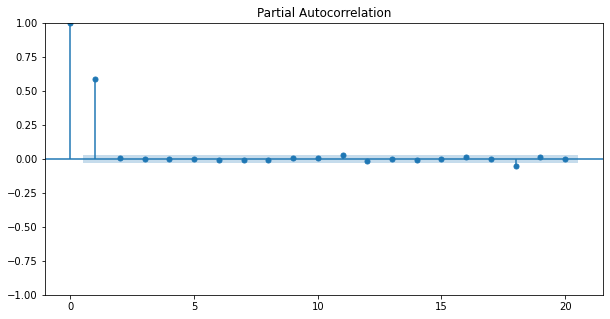

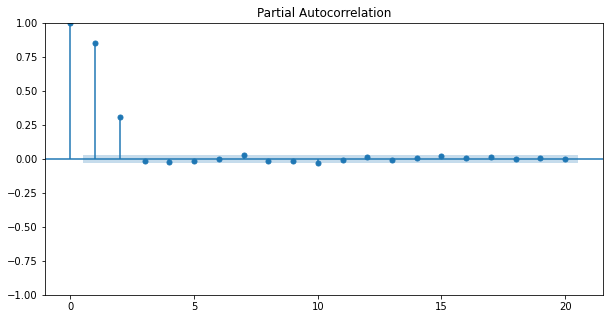

In [146]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate an AR(1) with  (remember that the sign for the AR parameter is reversed), Simulate AR(1) with phi=+0.6 
ar = np.array([1, -0.6])
ma= np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot the PACF for simulated_data_1 using the plot_pacf function.
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate an AR(2) with Simulate AR(2) with phi1=+0.6, phi2=+0.3
#  (again, reverse the signs)
ar = np.array([1, -0.6, -0.3])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot the PACF for simulated_data_2 using the plot_pacf function
plot_pacf(simulated_data_2, lags=20)
plt.show()

Note: Notice that the number of significant lags for the PACF indicate the order of the AR model

    These plots show the Partial Autocorrelation Function for AR models of different orders. In the upper left, for an AR(1) model, only the lag-*1* PACF is significantly different from zero. Similarly, for an AR(2) model, two lags are different from zero, and for and AR(3), three lags are different from zero. Finally, for White Noise, there are no lags that are significantly different from zero.

#### 3 B: Estimate Order of Model: Information Criteria

Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. You will take the AR(2) simulated data from the last exercise, saved as simulated_data_2, and compute the BIC as you vary the order, p, in an AR(p) from 0 to 6.

 - Import the ARMA module for estimating the parameters and computing BIC.
 - Initialize a numpy array BIC, which we will use to store the BIC for each AR(p) model.
 - Loop through order p for p = 0,…,6.
 - For each p, fit the data to an AR model of order p.
 - For each p, save the value of BIC using the .bic attribute (no parentheses) of res.
 - Plot BIC as a function of p (for the plot, skip p=0 and plot for p=1,…6)

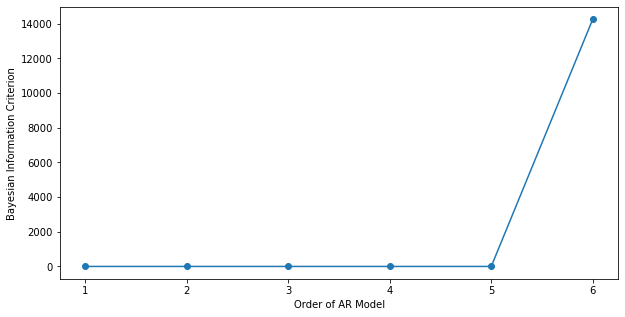

In [161]:
# Import the ARMA module for estimating the parameters and computing BIC.
# Initialize a numpy array BIC, which we will use to store the BIC for each AR(p) model.

# Loop through order p for p = 0,…,6.
   # For each p, fit the data to an AR model of order p.
# For each p, save the value of BIC using the .bic attribute (no parentheses) of res.
BIC = np.zeros([7])
for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p, 0, 0))
    res = mod.fit()

# Save BIC for AR(p)    
BIC[p] = res.bic

# Plot BIC as a function of p (for the plot, skip p=0 and plot for p=1,…6)
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

![](img15.png)

 note: For an AR(2), the BIC achieves its minimum at p=2, which is what we expect.